# Capstone project 1: Housing prices advanced regression



In [1]:
#-----------------------------------------------------------------------------#
import pandas as pd
import numpy as np

#Load training data from csv files
df = pd.read_csv('train.csv', index_col=['Id']) 


## Data exploration and cleaning

In [2]:
#get overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [3]:
#fill NA with 0
from pandas.api.types import is_string_dtype

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col]=df[col].fillna('0') #fill na with 0
    else:
        df[col]=df[col].fillna(0)

In [4]:
#change the year to age
for col in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[col] = df['YrSold'] - df[col]
#change SalePrice to fold of 1k
df['SalePrice'] = df.SalePrice / 1000

In [9]:
#create one more column to combine 1st floor square feet with 2nd floor, totalSF
df['totalSF'] = df['1stFlrSF'] + df['2ndFlrSF']


In [219]:
#ADD a column for price per square feet, PPSF
df['PPSF'] = df['SalePrice']/df['totalSF']

Id
1    0.121930
2    0.143819
3    0.125140
4    0.081538
5    0.113740
Name: PPSF, dtype: float64

In [10]:
#Drop duplicates
df = df.drop_duplicates()
df.shape     

(1460, 81)

In [11]:
#explore data range
df['YrSold'].min(),df['YrSold'].max()

(2006, 2010)

### Data visualization for Story Telling

In [207]:
# Question1: selling price change during years with Zoning info

import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets
%matplotlib inline

def plotyear(year):
    data = df[df.YrSold == year].sort_values(['MSZoning'],ascending=False)
    
    ax = sns.lmplot('totalSF','SalePrice',data, hue='MSZoning',height=5,aspect=3)
    
    plt.xlabel('total squre feet')
    plt.ylabel('SalePrice')
    plt.title(year,fontsize=20)
    plt.xlim(0,4000)
    plt.ylim(0,700)
    
interact(plotyear,year=widgets.IntSlider(min=2006,max=2010,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2010, min=2006), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [263]:
%matplotlib inline
# Question2: What neighborhood is most desirable
import matplotlib.cm as cm
import matplotlib.colors as colors


def plotyear(year):
    #select data according to year
    data = df[df.YrSold == year].sort_values(['LotArea','PPSF'],ascending=False)
    #size info from LotArea
    area = data.LotArea * 0.01
    #color infor from neighboorhood
    neighborhood = df.Neighborhood.unique()
    
    explain_neighborhood = {
      'Blmngtn':'Bloomington Heights',
      'Blueste':'Bluestem',
      'BrDale':'Briardale',
      'BrkSide':'Brookside',
       'ClearCr':'Clear Creek',
       'CollgCr':'College Creek',
       'Crawfor':'Crawford',
       'Edwards':'Edwards',
       'Gilbert':'Gilbert',
       'IDOTRR':'Iowa DOT and Rail Road',
       'MeadowV':'Meadow Village',
       'Mitchel':'Mitchell',
       'NAmes':'North Ames',
       'NoRidge':'Northridge',
       'NPkVill':'Northpark Villa',
       'NridgHt':'Northridge Heights',
       'NWAmes':'Northwest Ames',
       'OldTown':'Old Town',
       'SWISU':'South & West of Iowa State University',
       'Sawyer':'Sawyer',
       'SawyerW':'Sawyer West',
       'Somerst':'Somerset',
       'StoneBr':'Stone Brook',
       'Timber':'Timberland',
       'Veenker':'Veenker'
    }
    colormap = cm.gist_rainbow
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 1, len(neighborhood))]
    color_label = dict(zip(neighborhood,colorlist))
    color = data.Neighborhood.map(color_label)
    
    #Plot totalSF and SalePrice relationship
    data.plot.scatter('PPSF','OverallQual',
                     s=area,c=color,
                     linewidths=1,edgecolors='k',
                     figsize=(15,6))
    
    #plot legend
    for i in range(len(colorlist)):
        plt.scatter(-100,0,label=explain_neighborhood[neighborhood[i]],
                    color=color_label[neighborhood[i]],s=50,linewidths=1,edgecolors='k')
    plt.legend(ncol=1,bbox_to_anchor=(1, 1),loc=2)
    
    
    plt.xlabel('Price per square feet (k)',fontsize=18)
    plt.ylabel('OverallQual',fontsize=18)
    plt.title(year,fontsize=20)
    plt.xlim([0,0.3])
    plt.ylim([0,11])
    
interact(plotyear,year=widgets.IntSlider(min=2006,max=2010,step=1,value=2010))

interactive(children=(IntSlider(value=2010, description='year', max=2010, min=2006), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

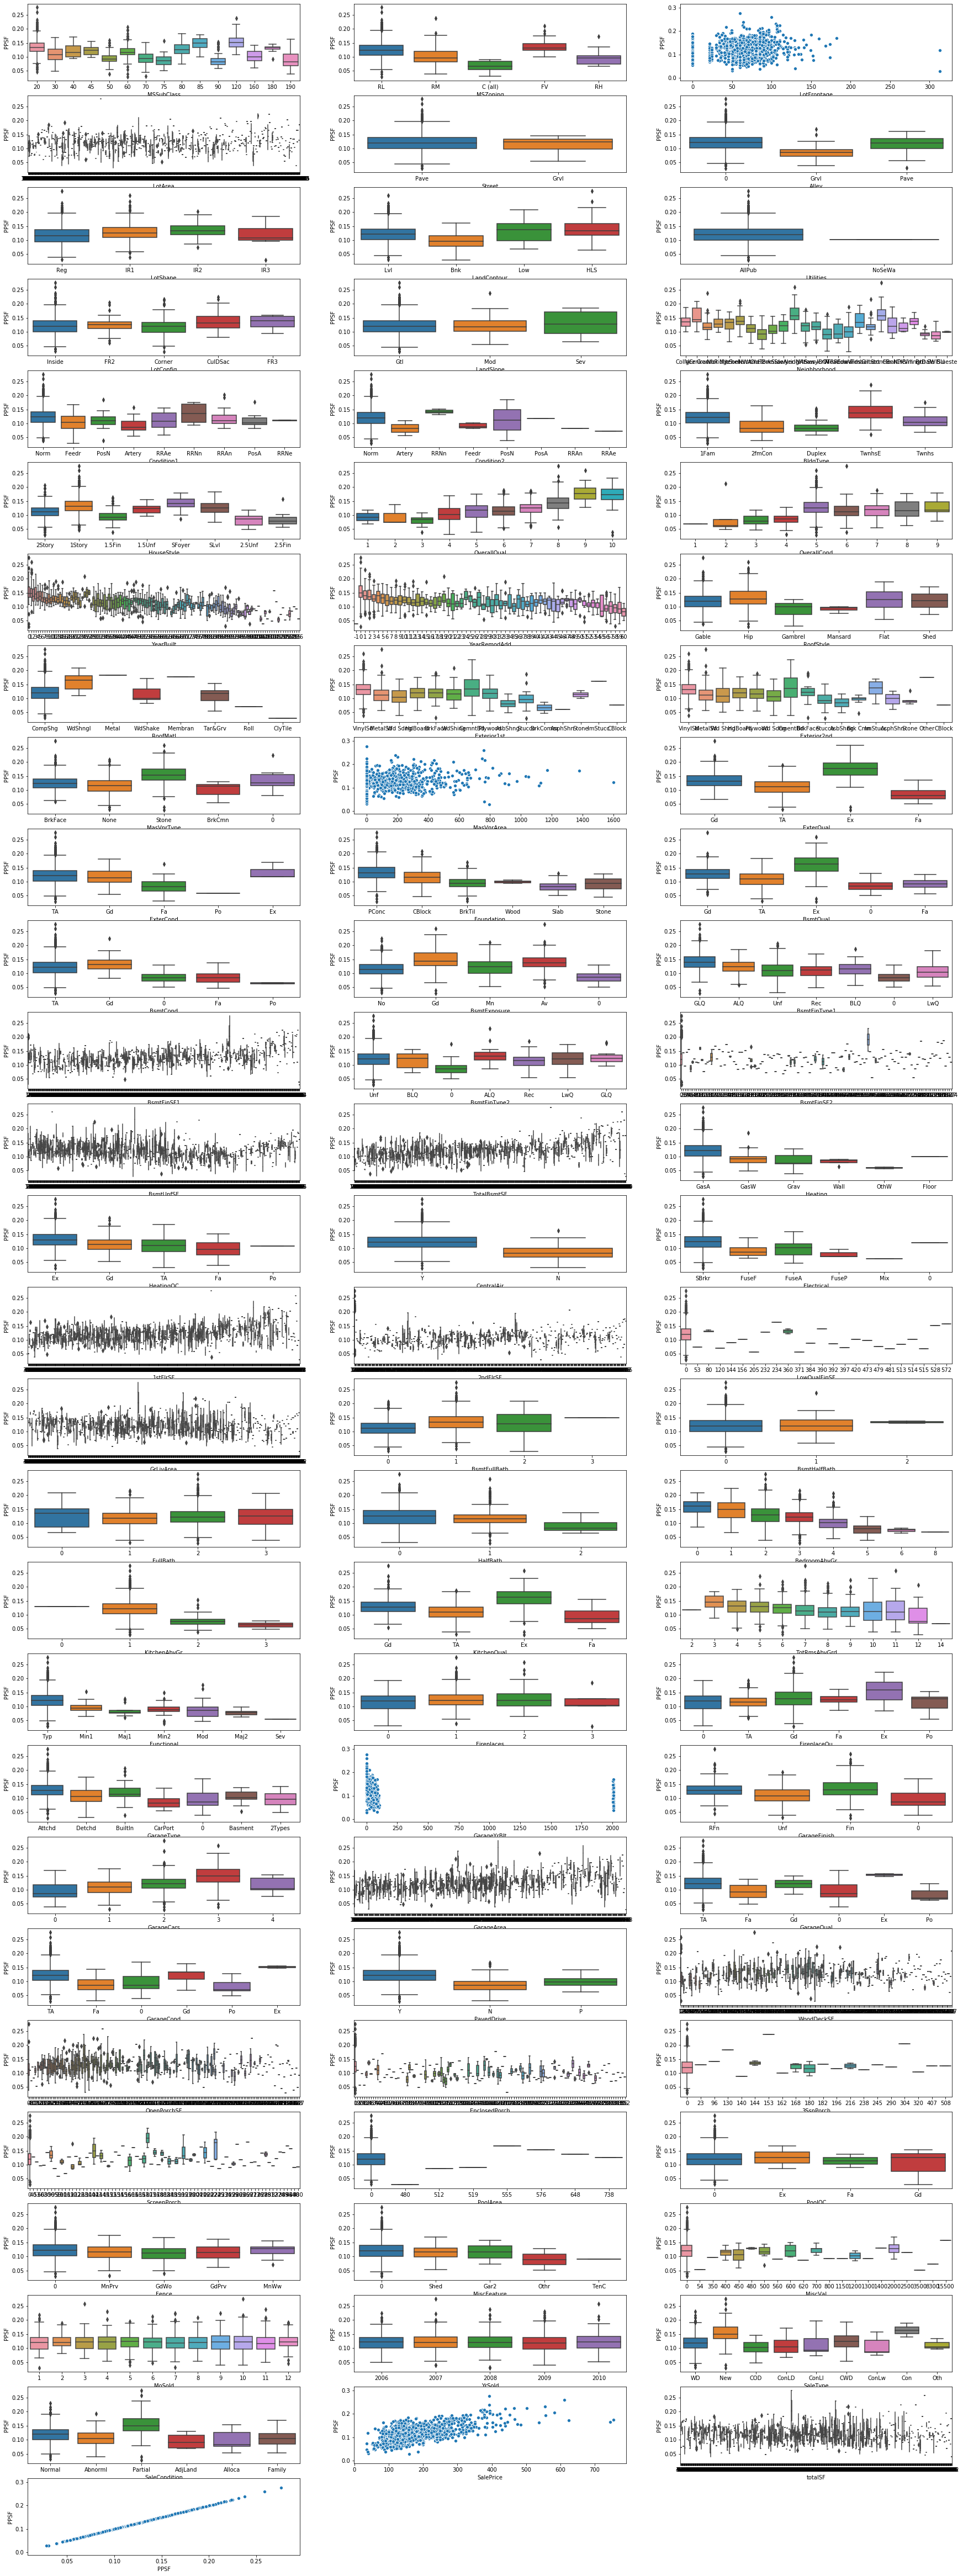

In [253]:
#plot coloumn and SalePrice relation
fig3 = plt.figure(figsize=(30,85))
y_col = 'PPSF'
a = 0 #active plot number
for col in df.columns:
    a += 1
    ax = fig3.add_subplot(28,3,a)
    if df[col].dtype == 'float64':
        sns.scatterplot(x=col, y=y_col, data=df,ax=ax)
    else:
        sns.catplot(x=col, y=y_col,kind='box',data=df,ax=ax)

    ax.set_xlabel(col)
    plt.close(2)
    
fig3.savefig('Correlation_plot.png')

## Modeling
## Xgboost

In [254]:
#usig Label Encoder to deal with categorial data
from sklearn.preprocessing import LabelEncoder
# dummy data using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

### For Price Per Square Feet

In [449]:
df1=df.drop('SalePrice',axis=1)
X,Y = df1.iloc[:,:-1],df1.iloc[:,-1]
le = LabelEncoder()
X = X.apply(lambda x: le.fit_transform(x))
X.shape

(1460, 80)

In [450]:
categorical_mask = (X.dtypes == 'object')

ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
X = ohe.fit_transform(X)

X.shape

(1460, 80)

In [451]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [452]:
%%time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'subsample':np.arange(0.05,1,0.05),
    'max_depth':np.arange(3,10,1)
}
model = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror')

random_search_r2 = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search_r2.fit(X_train,y_train)
print('Best score: ', random_search_r2.best_score_)
print('Bset model: ', random_search_r2.best_estimator_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.2s finished


Best score:  0.7197453465567195
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15000000000000002,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=None,
             n_estimators=250, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.4, verbosity=1)
CPU times: user 26.3 s, sys: 88.3 ms, total: 26.4 s
Wall time: 26.7 s


In [453]:
search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(50,300,50),
    'subsample':np.arange(0.05,1,0.05)
}
model = xgb.XGBRegressor(max_depth=8,objective='reg:squarederror')
random_search_mse = RandomizedSearchCV(estimator=model,
                                       param_distributions=search_grid,
                                       scoring='neg_mean_squared_error',
                                       cv=4,
                                       n_iter=10,
                                       verbose=1)
random_search_mse.fit(X_train,y_train)
print('Best score: ', random_search_mse.best_score_)
print('Bset model: ', random_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random_search_mse.best_score_)))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   19.5s finished


Best score:  -0.0002708937929105042
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.1, verbosity=1)
Best_RMSE:  0.016458851506423653


In [454]:
#Verify modeling fitting using test data
from sklearn.metrics import r2_score

#Using model from mean sqaure error
y_test_predict = random_search_mse.best_estimator_.predict(X_test)
r2_score(y_test,y_test_predict)

0.7531673718984332

In [455]:
#Using model from r2
y_test_predict = random_search_r2.best_estimator_.predict(X_test)
r2_score(y_test,y_test_predict)

0.741791528853478

### For Sale Price

In [497]:
df2=df.drop(['PPSF','totalSF'],axis=1)
Y2 = df2['SalePrice']
X2 = df2.drop('SalePrice',axis=1)

le2 = LabelEncoder()
X2 = X2.apply(lambda x: le2.fit_transform(x))
X2.shape

(1460, 79)

In [498]:
categorical_mask = (X2.dtypes == 'object')

ohe2 = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
X2 = ohe2.fit_transform(X2)

X2.shape

(1460, 79)

In [499]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [500]:
%%time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'subsample':np.arange(0.05,1,0.05),
    'max_depth':np.arange(3,10,1)
}
model = xgb.XGBRegressor(n_estimators=250,objective='reg:squarederror')

random2_search_r2 = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random2_search_r2.fit(X2_train,y2_train)
print('Best score: ', random2_search_r2.best_score_)
print('Bset model: ', random2_search_r2.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   27.6s finished


Best score:  0.7852653069189242
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.4, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.8500000000000001, verbosity=1)
CPU times: user 27.9 s, sys: 108 ms, total: 28 s
Wall time: 28.3 s


In [501]:
search_grid = {
    'learning_rate':np.arange(0.05,1,0.05),
    'n_estimators':np.arange(50,300,50),
    'subsample':np.arange(0.05,1,0.05)
}
model = xgb.XGBRegressor(max_depth=8,objective='reg:squarederror')
random2_search_mse = RandomizedSearchCV(estimator=model,
                                       param_distributions=search_grid,
                                       scoring='neg_mean_squared_error',
                                       cv=4,
                                       n_iter=10,
                                       verbose=1)
random2_search_mse.fit(X2_train,y2_train)

print('Best score: ', random2_search_mse.best_score_)
print('Bset model: ', random2_search_mse.best_estimator_)
print('Best_RMSE: ',np.sqrt(np.abs(random2_search_mse.best_score_)))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   31.0s finished


Best score:  -1192.0056905516597
Bset model:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.7000000000000001, verbosity=1)
Best_RMSE:  34.52543541436747


In [502]:
#Using model from mean square error
y2_test_predict_mse = random2_search_mse.best_estimator_.predict(X2_test)
r2_score(y2_test,y2_test_predict_mse)

0.9228568325191506

In [503]:
#Using model from r2
y2_test_predict_r2 = random2_search_r2.best_estimator_.predict(X2_test)
r2_score(y2_test,y2_test_predict_r2)

0.877088610544134

In [504]:
#prediction between two models are very similar
r2_score(y2_test_predict_mse,y2_test_predict_r2)

0.9504108503929444

## Analysis of Importance

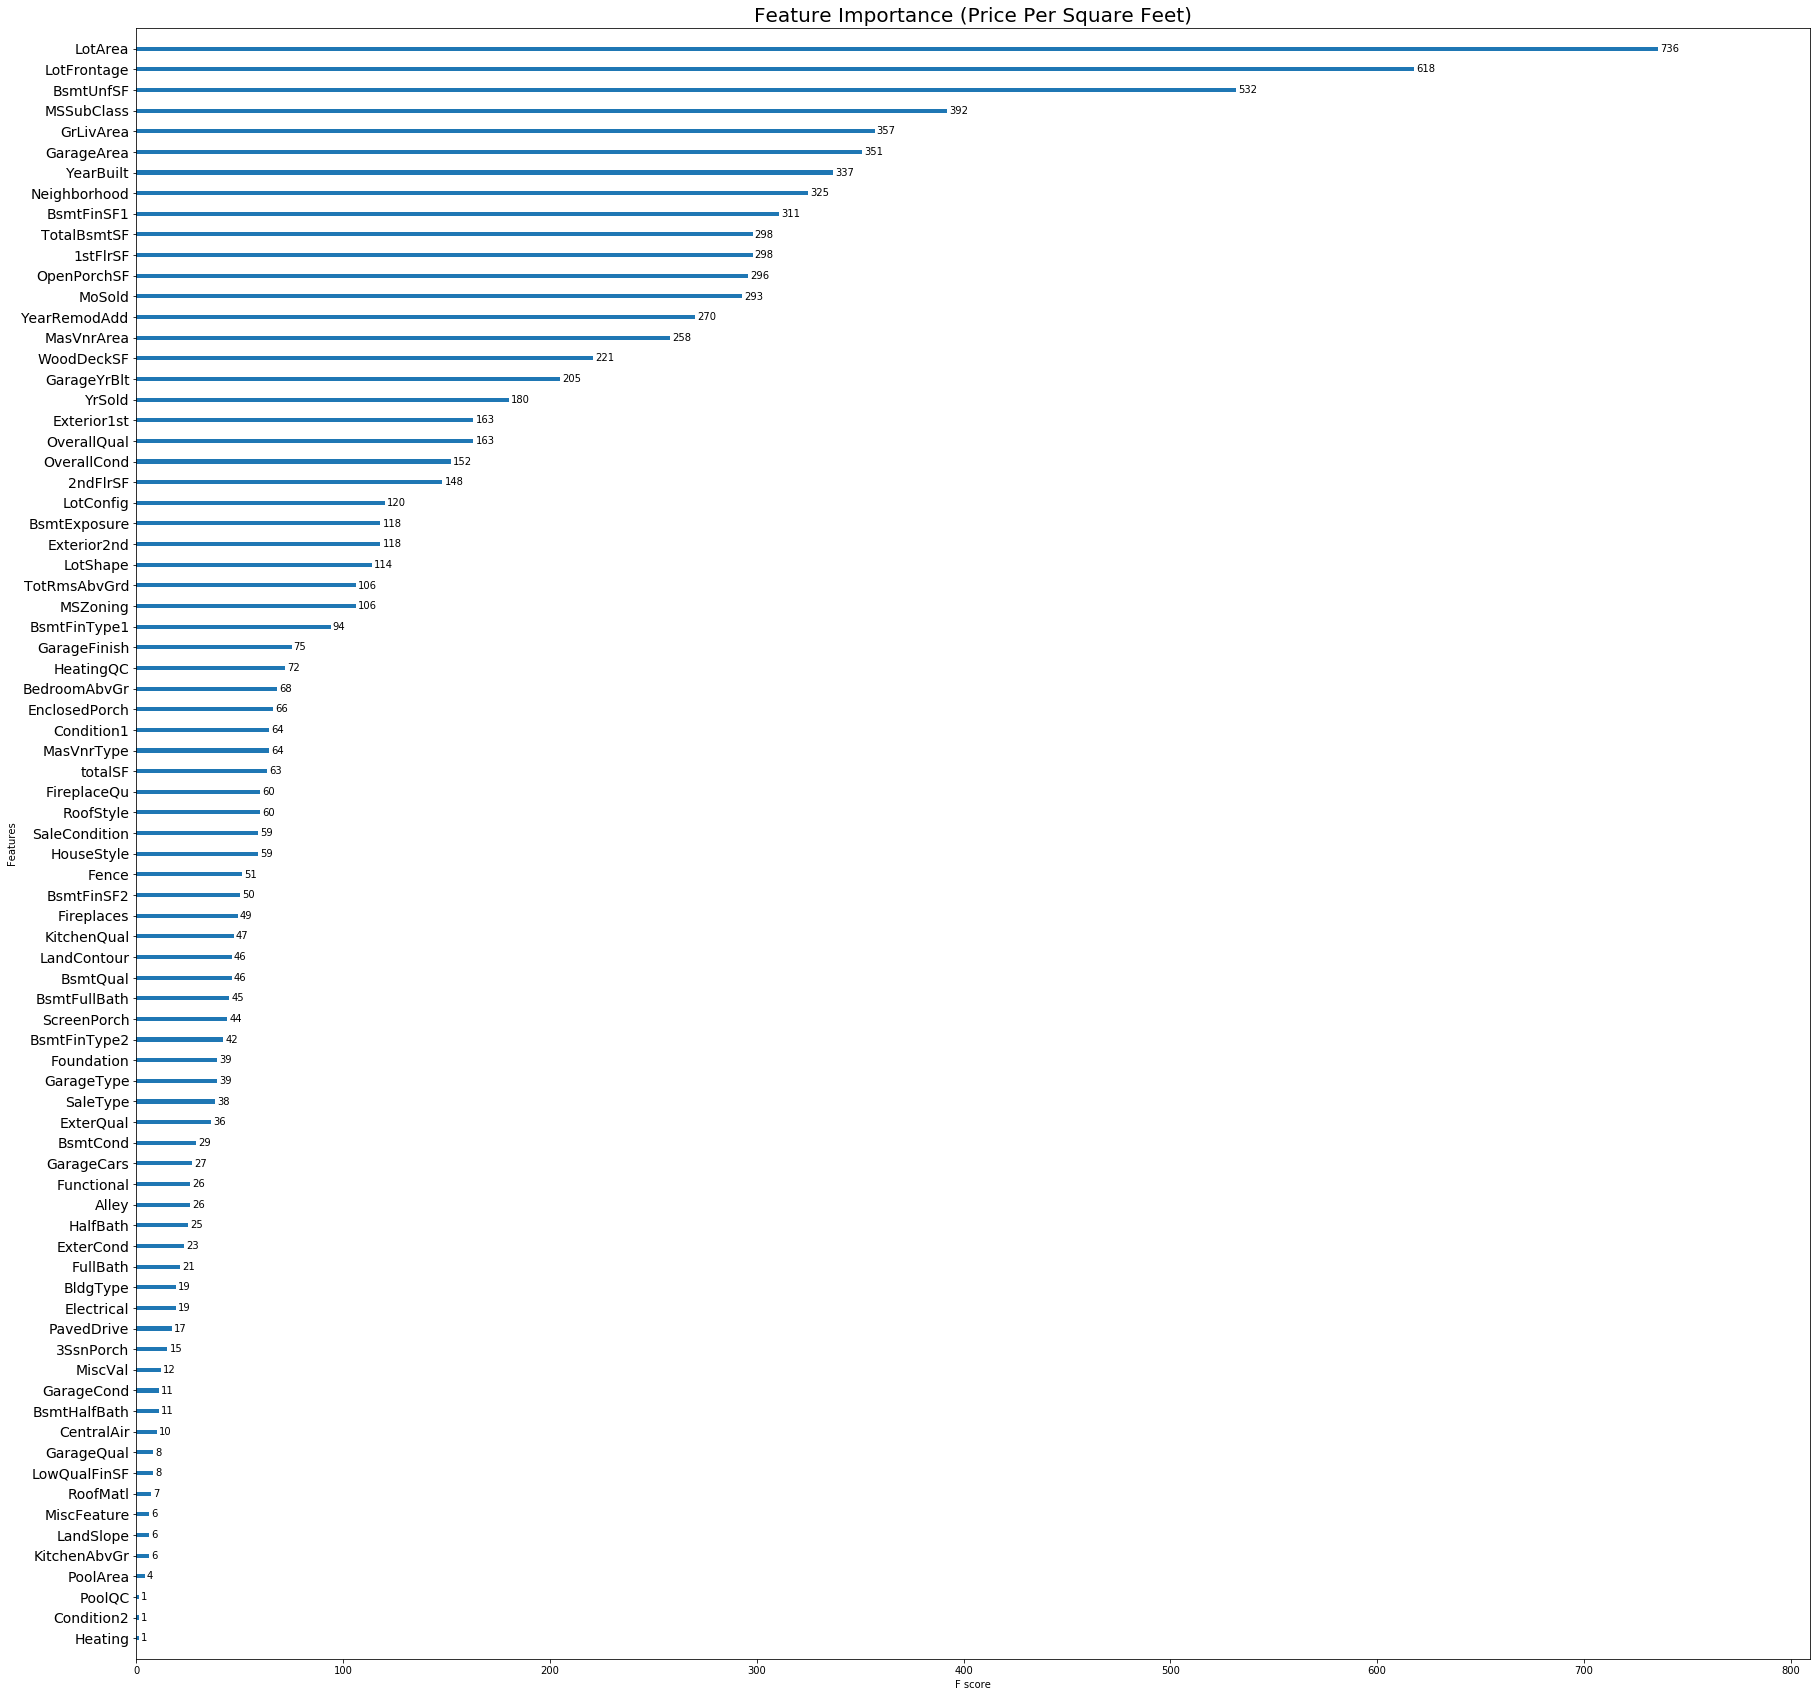

In [495]:
# plot importance of Price Per Square Feet
from xgboost import plot_importance
fig4, ax4 = plt.subplots(1,1,figsize=(30,30))

g1 = plot_importance(random_search_r2.best_estimator_,ax=ax4,grid=False)

oldy = g1.yaxis.get_majorticklabels()

features = ['f'+str(x) for x in range(len(df1.columns))]
feature_dict = dict(zip(features,df1.columns))

newy = [str(feature_dict[y._text]) for y in oldy]

g1.set_yticklabels(newy, rotation=0, fontsize = 14)
fig4.savefig('feature_importance_PPSF')
plt.title('Feature Importance (Price Per Square Feet)',fontsize=20)

plt.show()

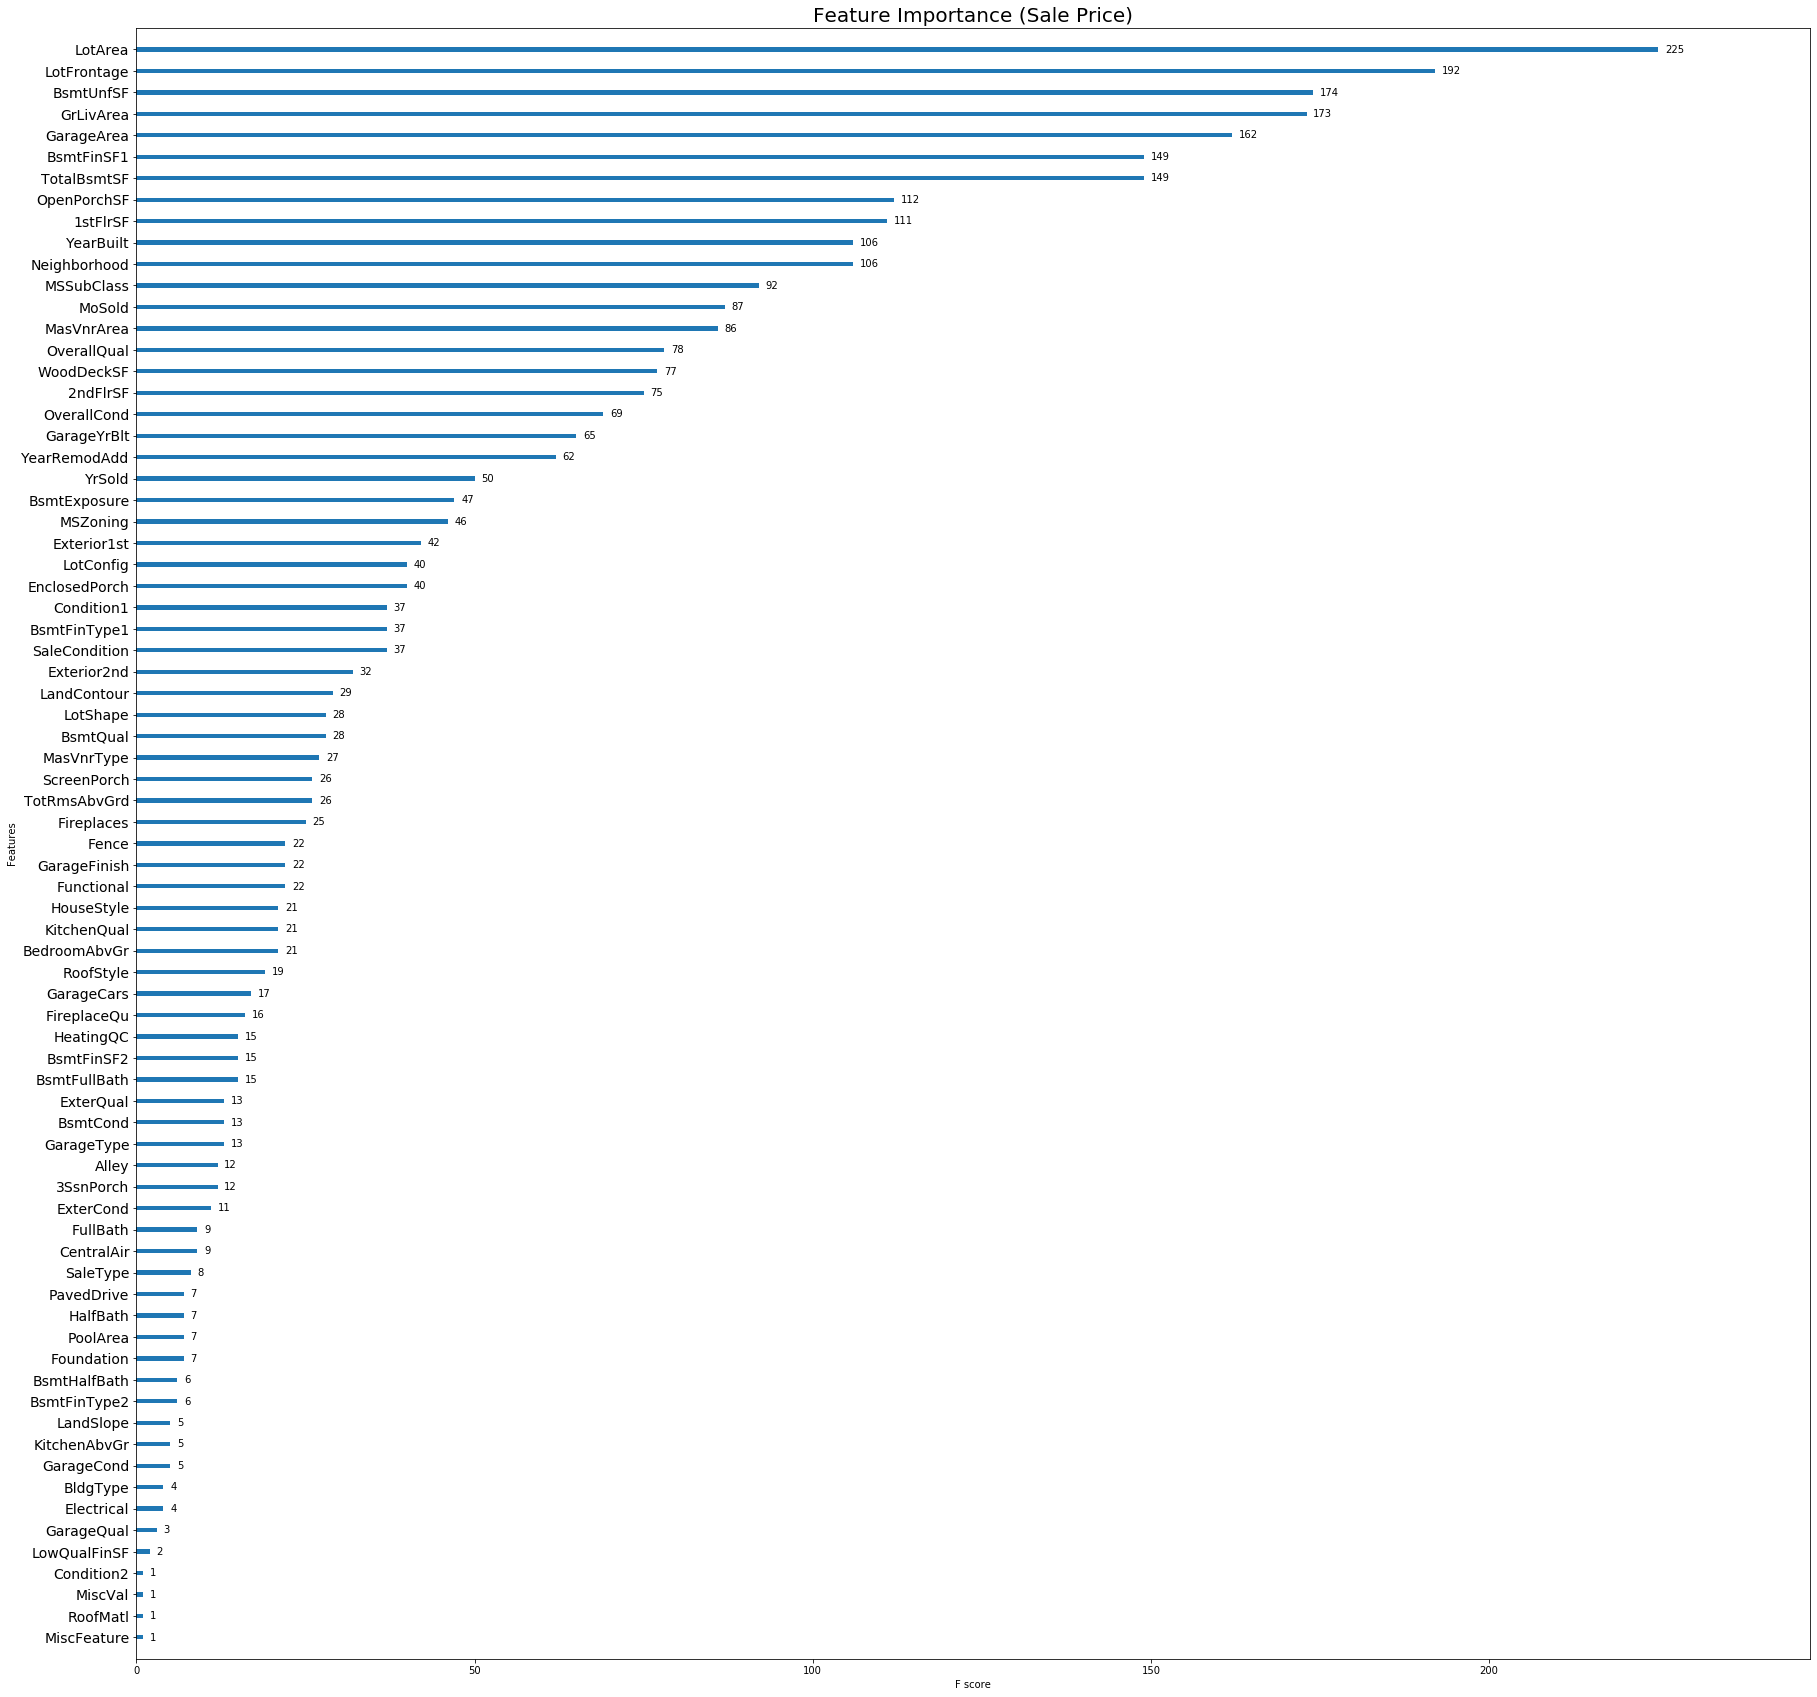

In [496]:
# plot importance of Sale Price
fig5, ax5 = plt.subplots(1,1,figsize=(30,30))

g2 = plot_importance(random2_search_r2.best_estimator_,ax=ax5,grid=False)

oldy2 = g2.yaxis.get_majorticklabels()

features2 = ['f'+str(x) for x in range(len(df2.columns))]
feature_dict2 = dict(zip(features2,df2.columns))

newy2 = [str(feature_dict2[y._text]) for y in oldy2]
g2.set_yticklabels(newy2, rotation=0, fontsize = 14)

plt.title('Feature Importance (Sale Price)',fontsize=20)

fig5.savefig('feature_importance_SalePrice.jpg')
plt.show()

### Predict Testing data using model for sale price


In [468]:
#Load test data
df_test = pd.read_csv('test.csv', index_col=['Id']) 
df2.shape,df_test.shape

((1460, 80), (1459, 79))

In [469]:
#Fill NA
for col in df_test.columns:
    if df_test[col].dtypes == 'object':
        df_test[col]=df_test[col].fillna('NA') #fill na with 0
    else:
        df_test[col]=df_test[col].fillna(0)
df_test.shape

(1459, 79)

In [470]:
#Drop duplicates
df_test = df_test.drop_duplicates()
df_test.shape    

(1459, 79)

In [473]:
#convert catergorical data using LabelEncoder and OneHotEncoder

le_test = LabelEncoder()
df_test = df_test.apply(lambda x: le_test.fit_transform(x))

mask = (df_test.dtypes == 'object')
ohe_test = OneHotEncoder(categorical_features=mask, sparse=False)
df_test = ohe_test.fit_transform(df_test)

df_test.shape

(1459, 79)

In [505]:
#predict using random2_search_r2 best model
y_predict_1 = random2_search_r2.best_estimator_.predict(df_test)

In [506]:
pd.DataFrame(y_predict_1).to_csv('prediction1.csv')

In [507]:
#predict using random2_search_mse best model
y_predict_2 = random2_search_mse.best_estimator_.predict(df_test)

In [508]:
pd.DataFrame(y_predict_2).to_csv('prediction2.csv')

In [509]:
#Two predicts is very similar
r2_score(y_predict_1,y_predict_2)

0.836454112991106

In [510]:
#Negative control check: when compare the y value in train data with predicted y data, there is no correlation.
r2_score(y_train[0:1000],y_predict_1[0:1000])

-31684456.11907678

In [511]:
#Negative control check: when compare the y value in train data with predicted y data, there is no correlation.
r2_score(y_train[0:1000],y_predict_2[0:1000])

-34569849.284537666

# Conclusion:
## Since in training model testing data, mse model has higher similarity between real data(0.92 2 versus 0.877), therefore, I choose prediction2 as the final results
